In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plot inline graphics
%pylab inline
import os.path


Populating the interactive namespace from numpy and matplotlib


In [6]:
# setup run parameters
inputfile = "2018-12-01 12_14_50_analysed.csv"
analysedfolder = "analysed"


In [7]:
filepath = os.path.join('./', analysedfolder, inputfile)
df = pd.read_csv(filepath)
df = df.infer_objects()
# force the datetime type (not inferred for some reason...)
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.head()

Date  Elapse (s)   Longitude   Latitude  Altitude (ft)  \
0 2018-12-01 13:40:00.089      5110.0  115.845256 -31.992234           10.0   
1 2018-12-01 13:40:05.089      5115.0  115.845253 -31.992305            4.3   
2 2018-12-01 13:40:10.089      5120.0  115.845252 -31.992404           -0.7   
3 2018-12-01 13:40:15.089      5125.0  115.845208 -31.992512           -1.8   
4 2018-12-01 13:40:20.089      5130.0  115.845191 -31.992629            1.1   

   Heading  Speed (kn)  Total Distance (Nm)  Headsail  Windspeed Approx  \
0    100.7         2.8                4.011         2                15   
1    101.7         3.1                4.015         2                15   
2    107.9         4.3                4.021         2                15   
3    106.9         5.0                4.028         2                15   
4    102.8         5.1                4.035         2                15   

      ...      Speed Smoothed  Beat  Port Tack  Stbd Tack  Port Tack Mean  \
0     ...                2.58     1          0          1      271.004931   
1     ...                2.52     1          0          1      271.004931   
2     ...                2.90     1          0          1      271.004931   
3     ...                3.58     1          0          1      271.004931   
4     ...                4.06     1          0          1      271.004931   

   Stbd Tack Mean  Tack  True Wind Inferred  Apparent Wind Inferred  \
0      188.243913   1.0          237.537422                    45.0   
1      188.243913   1.0          233.125050                    45.0   
2      188.243913   1.0          228.387148                    45.0   
3      188.243913   1.0          225.707442                    45.0   
4      188.243913   1.0          230.119129                    45.0   

   Lift/Knock  
0    4.293508  
1   -0.118864  
2   -4.856765  
3   -7.536472  
4   -3.124785  

[5 rows x 26 columns]

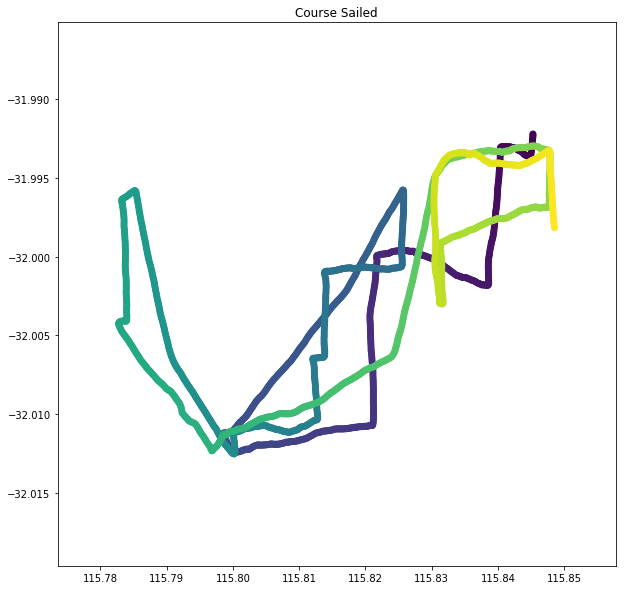

In [9]:
# plot the track - cool to hot for elapsed time
plt.figure(figsize=(10,10))
fig = plt.scatter(df['Longitude'], df['Latitude'], c=df['Date'])
plt.title("Course Sailed")
plt.show()

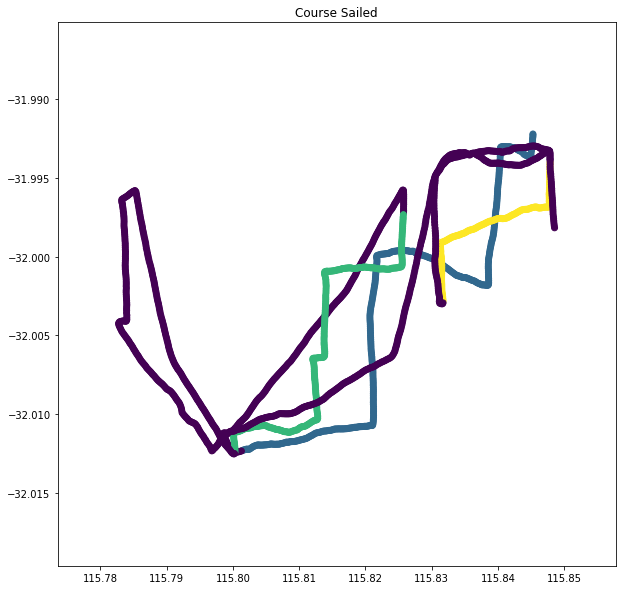

In [10]:
# plot the track - color the beats
plt.figure(figsize=(10,10))
fig = plt.scatter(df['Longitude'], df['Latitude'], c=df['Beat'])
plt.title("Course Sailed")
plt.savefig('images/01_course_beats.png')
plt.show()

In [24]:
# uncomment to trim beats - e.g. if the beat starts too early

# df.loc[df[(df['Beat']==2)].head(3).index, 'Port Tack'] = 0
# df.loc[df[(df['Beat']==2)].head(3).index, 'Stbd Tack'] = 0
# df.loc[df[(df['Beat']==2)].head(3).index, 'Tack'] = np.NaN

# df.loc[df[(df['Beat']==2)].head(3).index, 'Beat'] = np.NaN

# tacking_angle = 90
# df['True Wind Inferred'] = np.NaN
# df['True Wind Inferred'] =  np.where((df['Port Tack'] == 1), 
#                                      (df['Heading Smoothed'] - tacking_angle /2) % 360, df['True Wind Inferred'] )
# df['True Wind Inferred'] =  np.where((df['Stbd Tack'] == 1), 
#                                      (df['Heading Smoothed'] + tacking_angle /2) % 360, df['True Wind Inferred'] )

# # df['True Wind Inferred'].fillna(value=df['True Wind Inferred'].mean(), inplace=True)
# df['True Wind Inferred'].interpolate(inplace=True)
# df['Apparent Wind Inferred'] = ( df['True Wind Inferred'] - df['Heading Smoothed']) % 360

# lift_knock_window = 100

# #port tack logic
# df['Lift/Knock'] = np.where((df['Stbd Tack']==1), (df['Heading Smoothed'] - df['Stbd Tack Mean']) % 360, np.NaN)

# # starboard tack logic
# df['Lift/Knock'] = np.where((df['Port Tack']==1), (df['Port Tack Mean'] - df['Heading Smoothed']) % 360, df['Lift/Knock'])

# # fix degress > 180
# df['Lift/Knock'] = np.where((df['Lift/Knock']>180), df['Lift/Knock']-360, df['Lift/Knock'])

# Beat Analysis
Analyse lifts and knocks for each beat. True and apparent wind are inferred from tacking angles.

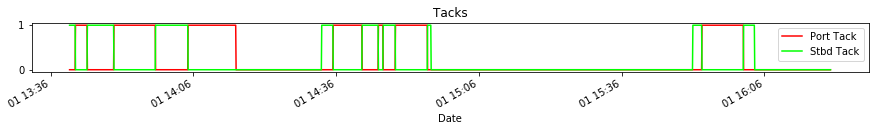

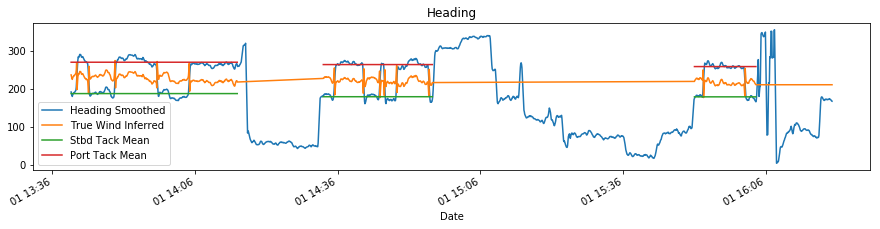

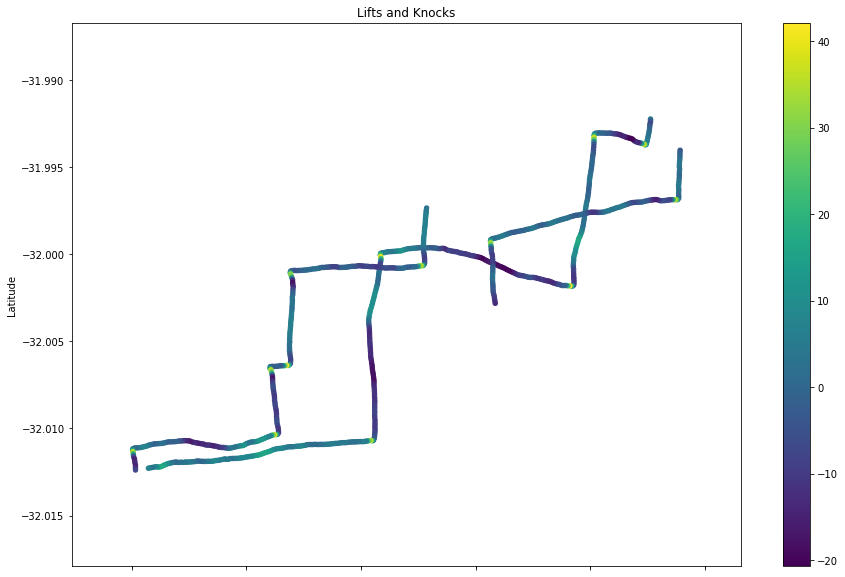

In [12]:
df.plot(x='Date', y=['Port Tack','Stbd Tack'], figsize=(15,1), color=['red','lime'], title="Tacks")
plt.savefig('images/02_tacks.png')
df.plot(x='Date', y=['Heading Smoothed', 'True Wind Inferred', 'Stbd Tack Mean', 'Port Tack Mean'], figsize=(15,3), title='Heading')
plt.savefig('images/03_heading_lift_knock.png')
df.plot.scatter(x='Longitude', y='Latitude', c=df['Lift/Knock'], cmap=cm.viridis, figsize=(15,10), title="Lifts and Knocks")
plt.savefig('images/04_course_lift_knock.png')
# df.plot(x='Date', y=['Speed Smoothed'], figsize=(15,3), title='Speed')
plt.show()


In [13]:
df.corr()['Lift/Knock']

Elapse (s)                2.290587e-02
Longitude                -1.075489e-01
Latitude                 -9.637164e-02
Altitude (ft)            -1.152017e-01
Heading                  -6.520586e-02
Speed (kn)               -2.881958e-01
Total Distance (Nm)       2.203863e-02
Headsail                           NaN
Windspeed Approx                   NaN
Longitude Radians        -1.075489e-01
Latitude Radians         -9.637164e-02
Heading Calculated       -4.119218e-02
Heading Smoothed         -4.303409e-02
Heading ROC               6.228335e-02
Speed Calculated         -2.862874e-01
Speed Smoothed           -2.114658e-01
Beat                     -3.948566e-15
Port Tack                -4.261793e-15
Stbd Tack                 4.261793e-15
Port Tack Mean            4.123982e-15
Stbd Tack Mean            4.697233e-15
Tack                      4.261793e-15
True Wind Inferred       -1.546962e-01
Apparent Wind Inferred   -4.280330e-15
Lift/Knock                1.000000e+00
Name: Lift/Knock, dtype: 

In [9]:
# # averages 
# avg_speed_port = df[(df['Port Tack'] == 1)]['Speed (kn)'].mean()
# avg_speed_stbd = df[(df['Stbd Tack'] == 1)]['Speed (kn)'].mean()

# avg_angle_port = df[(df['Port Tack'] == 1)]['Apparent Wind Inferred'].mean()
# avg_angle_port = 360 - avg_angle_port
# avg_angle_stbd = df[(df['Stbd Tack'] == 1)]['Apparent Wind Inferred'].mean()


# avg_lift_knock = df['Lift/Knock'].mean()
# print("""Averages: 
#     Port Tack Speed: \t{:.2f} \tAngle: {:.2f} 
#     Stbd Tack Speed: \t{:.2f} \tAngle: {:.2f} 
#     Lift(+)/Knock(-): \t{:.2f} deg""".format(avg_speed_port, avg_angle_port, avg_speed_stbd, avg_angle_stbd, avg_lift_knock))

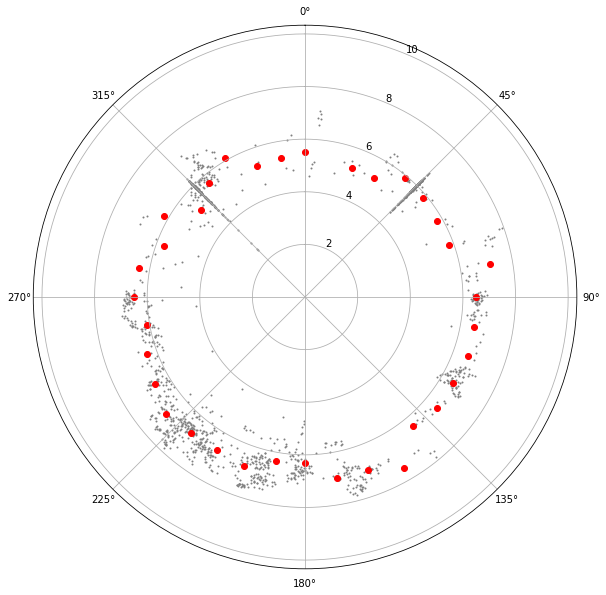

In [14]:
# plot all recorded polars
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="polar")
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.scatter(-1 * df['Apparent Wind Inferred'] * np.pi / 180.0, df['Speed Smoothed'], color="grey", s=1)

# bin polars in 10 degree buckets and get the mean speed for each bucket
bins = list(range(0,360,10))
df2 = df.groupby(pd.cut(df['Apparent Wind Inferred'], bins))['Speed Smoothed'].mean().reset_index()
df2['theta'] = bins[:-1]
df2['theta'] = -1 * df2['theta'] * np.pi / 180.0

# plot binned means on the polar
ax.scatter(df2['theta'], df2['Speed Smoothed'], color="red")

In [175]:
# write back over the analysed file
df.to_csv(filepath, index=False)